In [ ]:
import os
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Depression Professional Dataset.csv"
df = pd.read_csv(file_path)
# Show basic information and preview of the dataset
df.info(), df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2054 non-null   object 
 1   Age                                    2054 non-null   int64  
 2   Work Pressure                          2054 non-null   float64
 3   Job Satisfaction                       2054 non-null   float64
 4   Sleep Duration                         2054 non-null   object 
 5   Dietary Habits                         2054 non-null   object 
 6   Have you ever had suicidal thoughts ?  2054 non-null   object 
 7   Work Hours                             2054 non-null   int64  
 8   Financial Stress                       2054 non-null   int64  
 9   Family Hist

(None,
    Gender  Age  Work Pressure  Job Satisfaction Sleep Duration Dietary Habits  \
 0  Female   37            2.0               4.0      7-8 hours       Moderate   
 1    Male   60            4.0               3.0      5-6 hours      Unhealthy   
 2  Female   42            2.0               3.0      5-6 hours       Moderate   
 3  Female   44            3.0               5.0      7-8 hours        Healthy   
 4    Male   48            4.0               3.0      7-8 hours       Moderate   
 
   Have you ever had suicidal thoughts ?  Work Hours  Financial Stress  \
 0                                    No           6                 2   
 1                                   Yes           0                 4   
 2                                    No           0                 2   
 3                                   Yes           1                 2   
 4                                   Yes           6                 5   
 
   Family History of Mental Illness Depression  
 0  

In [ ]:
# Check for null values
null_summary = df.isnull().sum()
null_summary[null_summary > 0]

,0


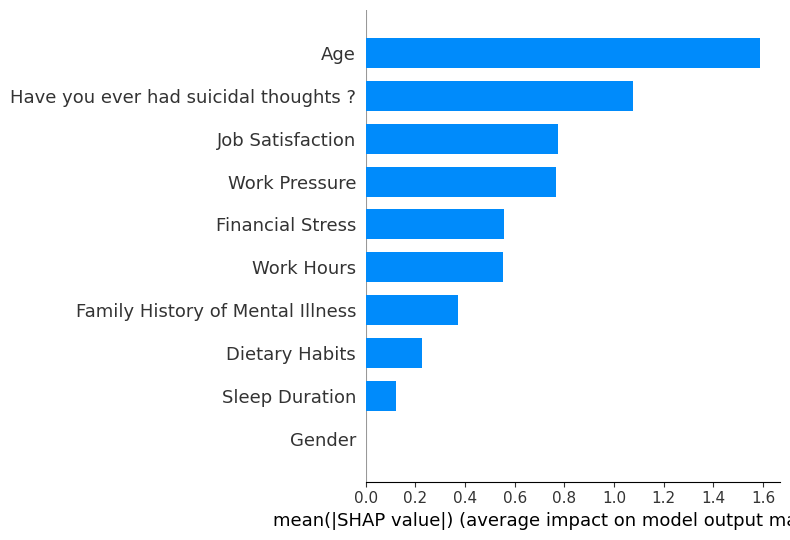

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import shap
import matplotlib.pyplot as plt

##        SHAP Graph          ##

# Label encode categorical features
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Define X and y
X = df_encoded.drop("Depression", axis=1)
y = df_encoded["Depression"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# SHAP explanation
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)  # Use full test set

# Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [ ]:
X=df.drop(["Depression"],axis=1)
y=df["Depression"]
y=pd.DataFrame(y)

In [ ]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

Logistic Regression Accuracy: 0.98


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(classification_report(y_test, lr_y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       374
           1       0.89      0.84      0.86        37

    accuracy                           0.98       411
   macro avg       0.93      0.91      0.92       411
weighted avg       0.98      0.98      0.98       411



,precision,recall,f1-score,support
0,0.965789,0.997283,0.981283,368.000000
1,0.967742,0.697674,0.810811,43.000000
accuracy,0.965937,0.965937,0.965937,0.965937
macro avg,0.966766,0.847479,0.896047,411.000000
weighted avg,0.965994,0.965937,0.963448,411.000000


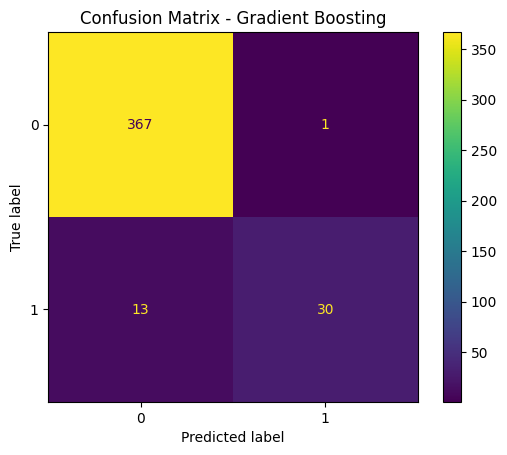

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import shap

# Copy of dataframe for encoding
df_encoded = df.copy()

# Encode categorical variables
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Define features and target
X = df_encoded.drop("Depression", axis=1)
y = df_encoded["Depression"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

report


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import shap

# Copy of dataframe for encoding
df_encoded = df.copy()

# Encode categorical variables
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Define features and target
X = df_encoded.drop("Depression", axis=1)
y = df_encoded["Depression"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=40)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

report


{'0': {'precision': 0.9657894736842105,
  'recall': 0.9892183288409704,
  'f1-score': 0.9773635153129161,
  'support': 371.0},
 '1': {'precision': 0.8709677419354839,
  'recall': 0.675,
  'f1-score': 0.7605633802816901,
  'support': 40.0},
 'accuracy': 0.9586374695863747,
 'macro avg': {'precision': 0.9183786078098473,
  'recall': 0.8321091644204852,
  'f1-score': 0.8689634477973032,
  'support': 411.0},
 'weighted avg': {'precision': 0.9565610812999062,
  'recall': 0.9586374695863747,
  'f1-score': 0.9562637454801933,
  'support': 411.0}}